# customer clustring with K-MEANS 

in order to cluster the customers in this training after trying others   aproaches shuch as DBSCAN we choosed k-means solutions because average volume of datas and unable to find appropriate density areas.

In [1]:
import random 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [2]:
df = pd.read_csv('customer.csv')
df.head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
from sklearn.preprocessing import StandardScaler
df=df.replace(to_replace='Male',value=1)
df=df.replace(to_replace='Female',value=0)
X=df.values[:,1:]
ds=StandardScaler().fit_transform(X)
X=np.nan_to_num(X)
ds
#print (X)

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [4]:
clusternumber = 5
kmean = KMeans(init = "k-means++" , n_clusters = clusternumber , n_init = 20)
kmean.fit(X)
label = kmean.labels_


In [5]:
df ["clus"]= label
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clus
0,1,1,19,15,39,1
1,2,1,21,15,81,3
2,3,0,20,16,6,1
3,4,0,23,16,77,3
4,5,0,31,17,40,1


In [6]:
df.groupby('clus').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
clus,,,,,
0,162.000000,0.461538,32.692308,86.538462,82.128205
1,23.000000,0.391304,45.217391,26.304348,20.913043
2,86.265823,0.417722,43.088608,55.291139,49.569620
3,24.000000,0.391304,25.521739,26.304348,78.565217
4,163.500000,0.527778,40.666667,87.750000,17.583333


In [7]:
df['clus'].value_counts()

2    79
0    39
4    36
1    23
3    23
Name: clus, dtype: int64

C:\Users\sina\AppData\Local\Temp\ipykernel_2020\1719335604.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 2], X[:, 3], s=area, c=label.astype(np.float), alpha=0.7)


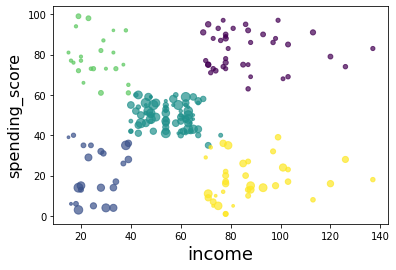

In [8]:
area = np.pi * ( ds[:, 1]+3)**2 #age in bolded  
plt.scatter(X[:, 2], X[:, 3], s=area, c=label.astype(np.float), alpha=0.7)
plt.xlabel('income', fontsize=18)
plt.ylabel('spending_score', fontsize=16)

plt.show()

C:\Users\sina\AppData\Local\Temp\ipykernel_2020\1331824303.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 3], s=area, c=label.astype(np.float), alpha=0.7)


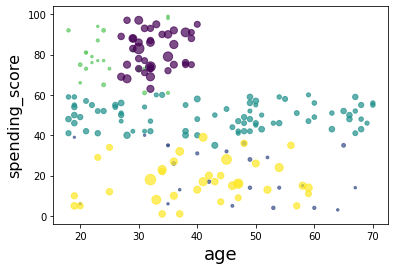

In [9]:
area = np.pi * ( ds[:, 2]+3)**2 #income is bolded
plt.scatter(X[:, 1], X[:, 3], s=area, c=label.astype(np.float), alpha=0.7)
plt.xlabel('age', fontsize=18)
plt.ylabel('spending_score', fontsize=16)

plt.show()

C:\Users\sina\AppData\Local\Temp\ipykernel_2020\4015443966.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:, 1], X[:, 2], s=area, c=label.astype(np.float), alpha=0.4)


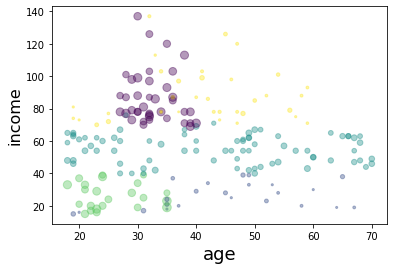

In [10]:
area = np.pi * ( ds[:, 3]+3)**2  #
plt.scatter(X[:, 1], X[:, 2], s=area, c=label.astype(np.float), alpha=0.4)
plt.xlabel('age', fontsize=18)
plt.ylabel('income', fontsize=16)

plt.show()